<center><h1>Practice Project: Data Exploration</h1></center>

## Importing Necessary Libraries for Data Exploration

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # Apply the default seaborn theme, scaling, and color palette

import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

## About Dataset
This classic dataset contains the prices and other attributes of almost 54,000 diamonds. It's a great dataset for beginners learning to work with data analysis and visualization.

### Attributes

* $price =$ price in US dollars (\\$326--\\$18,823)
* $carat =$ weight of the diamond (0.2--5.01)
* $cut =$ quality of the cut (Fair, Good, Very Good, Premium, Ideal)
* $color =$ diamond colour, from J (worst) to D (best)
* $clarity =$ a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
* $x =$ length in mm (0--10.74)
* $y =$ width in mm (0--58.9)
* $z =$ depth in mm (0--31.8)
* $depth =$ total depth percentage = $z / mean(x, y) = 2 * z / (x + y) (43--79)$
* $table =$ width of top of diamond relative to widest point (43--95)

## Load the Dataset

In [2]:
diamonds = sns.load_dataset("diamonds")  # Loaded in a Pandas DataFrame
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## 1.0 Variable Identification

In [3]:
diamonds.dtypes

carat       float64
cut        category
color      category
clarity    category
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object

In [4]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


## 2.0 Univariate Analysis

### 2.1 For continuous variables: mean, median, mode, min, max, histograms (distribution), and boxplots

In [5]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [6]:
diamonds.describe(include=['category'])

,cut,color,clarity
count,53940,53940,53940
unique,5,7,8
top,Ideal,G,SI1
freq,21551,11292,13065


### 2.2 For categorical variables: frequency table, count plot

Frequency table for cut:
cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64




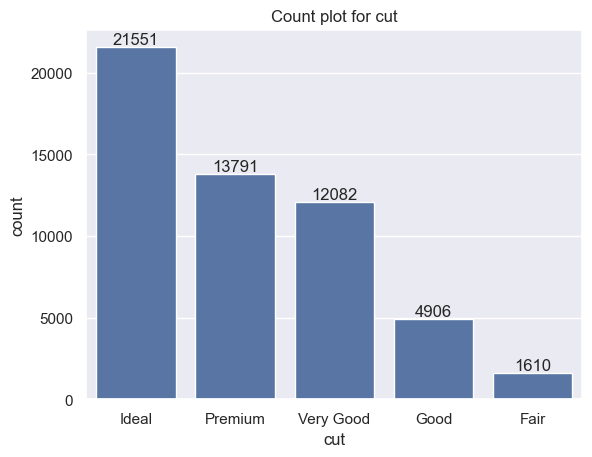

Frequency table for color:
color
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: count, dtype: int64




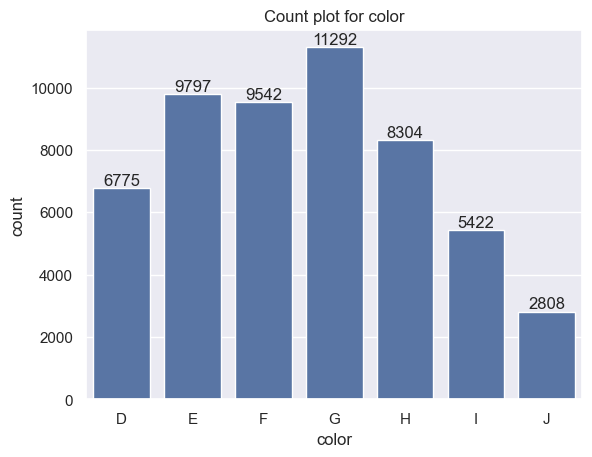

Frequency table for clarity:
clarity
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: count, dtype: int64




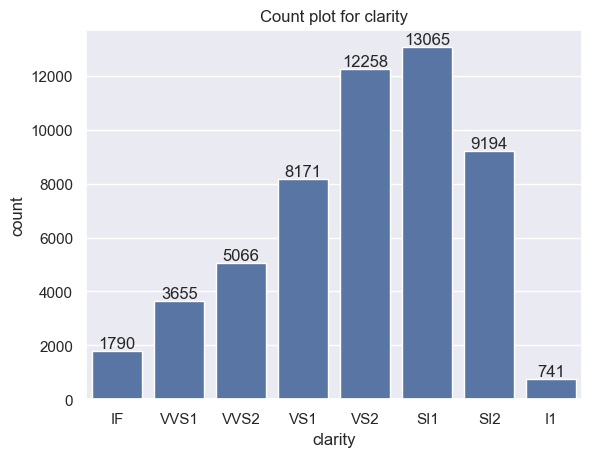

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

diamonds_cat = diamonds.select_dtypes(include=['object', 'category'])

# Frequency tables and count plots for each categorical variable
for col in diamonds_cat.columns:
    print(f'Frequency table for {col}:')
    print(diamonds[col].value_counts())
    print('\n')
    ax = sns.countplot(x=col, data=diamonds)
    plt.title(f'Count plot for {col}')
    
    # Add count labels on top of each bar
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom')
    plt.show()

## 3.0 Bi-variate Analysis

### 3.1 Continuous \& Continuous: scatter plots

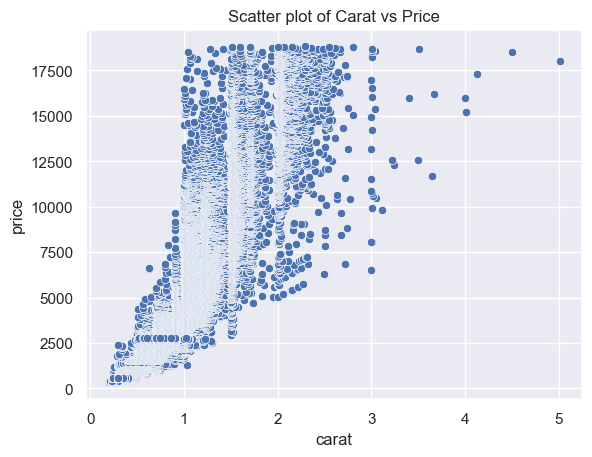

In [8]:
# Select only continuous (numeric) columns
diamonds_cont = diamonds.select_dtypes(include=['float64', 'int64'])

# Example: scatter plot for 'carat' vs 'price'
sns.scatterplot(x='carat', y='price', data=diamonds)
plt.title('Scatter plot of Carat vs Price')
plt.show()



### 3.2 Categorical & Categorical: stacked column chart

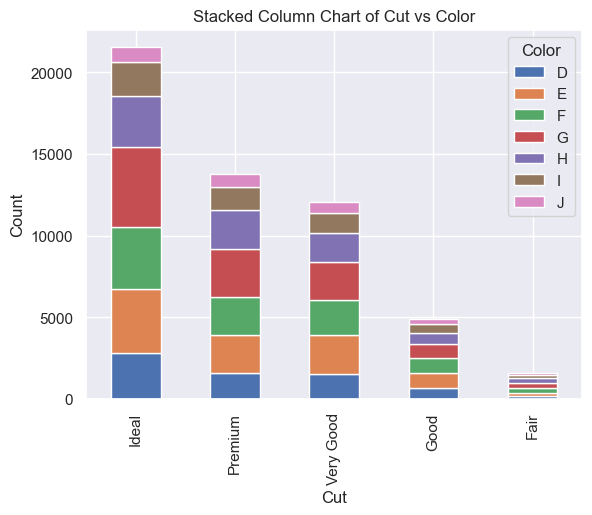

In [9]:
# Create a frequency table (crosstab) for two categorical variables
crosstab = pd.crosstab(diamonds['cut'], diamonds['color'])

# Plot as a stacked column chart
crosstab.plot(kind='bar', stacked=True)
plt.title('Stacked Column Chart of Cut vs Color')
plt.xlabel('Cut')
plt.ylabel('Count')
plt.legend(title='Color')
plt.show()

### 3.3 Categorical & Continuous: boxplots

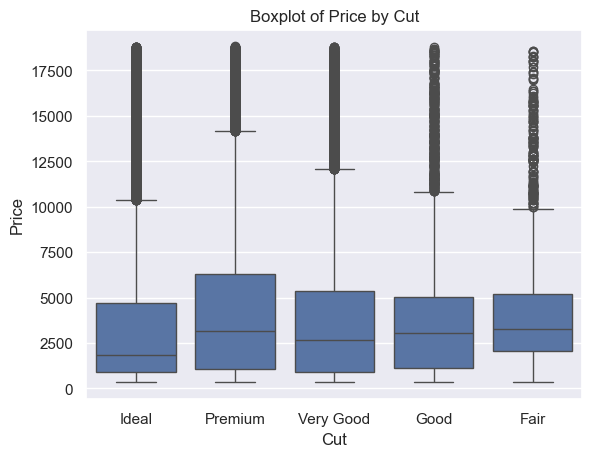

In [10]:
# Boxplot of price (continuous) by cut (categorical)
sns.boxplot(x='cut', y='price', data=diamonds)
plt.title('Boxplot of Price by Cut')
plt.xlabel('Cut')
plt.ylabel('Price')
plt.show()

### 3.4 Correlation Analysis: correlation matrix

          carat     depth     table     price         x         y         z
carat  1.000000  0.028224  0.181618  0.921591  0.975094  0.951722  0.953387
depth  0.028224  1.000000 -0.295779 -0.010647 -0.025289 -0.029341  0.094924
table  0.181618 -0.295779  1.000000  0.127134  0.195344  0.183760  0.150929
price  0.921591 -0.010647  0.127134  1.000000  0.884435  0.865421  0.861249
x      0.975094 -0.025289  0.195344  0.884435  1.000000  0.974701  0.970772
y      0.951722 -0.029341  0.183760  0.865421  0.974701  1.000000  0.952006
z      0.953387  0.094924  0.150929  0.861249  0.970772  0.952006  1.000000


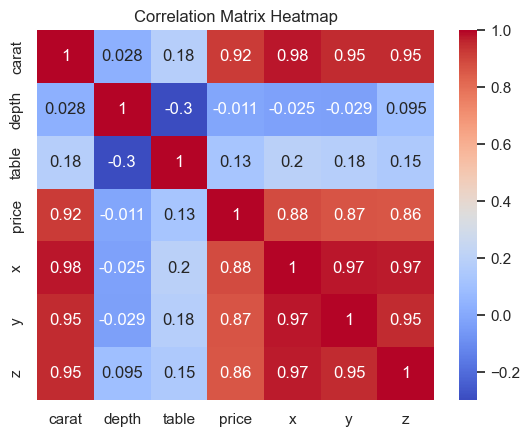

In [11]:
# Compute and display the correlation matrix for continuous variables
corr_matrix = diamonds.corr(numeric_only=True)
print(corr_matrix)

# Optional: visualize the correlation matrix as a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

## 4.0 Missing Value Analysis

In [12]:
diamonds.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

## 5.0 Outlier Analysis

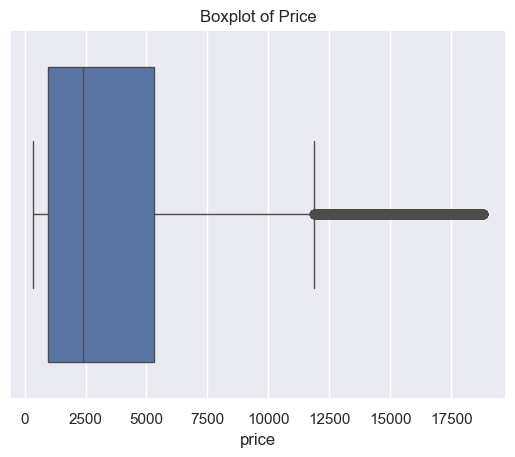

Number of outliers in price: 3540


In [13]:
# Visualize outliers with a boxplot
sns.boxplot(x=diamonds['price'])
plt.title('Boxplot of Price')
plt.show()

# Calculate IQR for 'price'
Q1 = diamonds['price'].quantile(0.25)
Q3 = diamonds['price'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = diamonds[(diamonds['price'] < lower_bound) | (diamonds['price'] > upper_bound)]
print(f'Number of outliers in price: {outliers.shape[0]}')

## 6.0 Class Imbalance Analysis

**Note:** This is not a classification problem. Here the target variable is $price$. You can just explore the frequency table of some categorical variables.

In [14]:
diamonds["cut"].value_counts()

cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64